In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
from cartopy import crs as ccrs, feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cmcrameri import cm


In [2]:
PROJECTION = ccrs.PlateCarree()


def prep_axes(ax, extents=[-125, -65, 22, 58]):
    ax.set_extent(extents, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE.with_scale("50m"), edgecolor="gray", zorder=1)
    ax.add_feature(cfeature.STATES.with_scale("50m"), linewidth=0.3, edgecolor="gray", zorder=0)
    ax.spines[:].set_color("gray")
    gl = ax.gridlines(
        crs=PROJECTION,
        linewidth=0.8,
        color="gray",
        alpha=0.5,
        linestyle="--",
        draw_labels=True,
        zorder=0,
    )
    gl.top_labels = False
    gl.bottom_labels = True
    gl.left_labels = True
    gl.right_labels = False
    gl.xlines = True
    gl.ylines = True
    gl.ylocator = mticker.FixedLocator([30, 40, 50])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax


In [4]:
date_sif = "2021-07-01"
date_xco2 = "2021-08-01"

with xr.open_dataset(
    "../data/production/OCO2_005deg_monthly_north_america_with_basis.nc4"
) as ds:
    df_sif = ds["sif"].sel(time=date_sif).squeeze().to_dataframe().reset_index().dropna()
    df_xco2 = ds["xco2"].sel(time=date_xco2).squeeze().to_dataframe().reset_index().dropna()


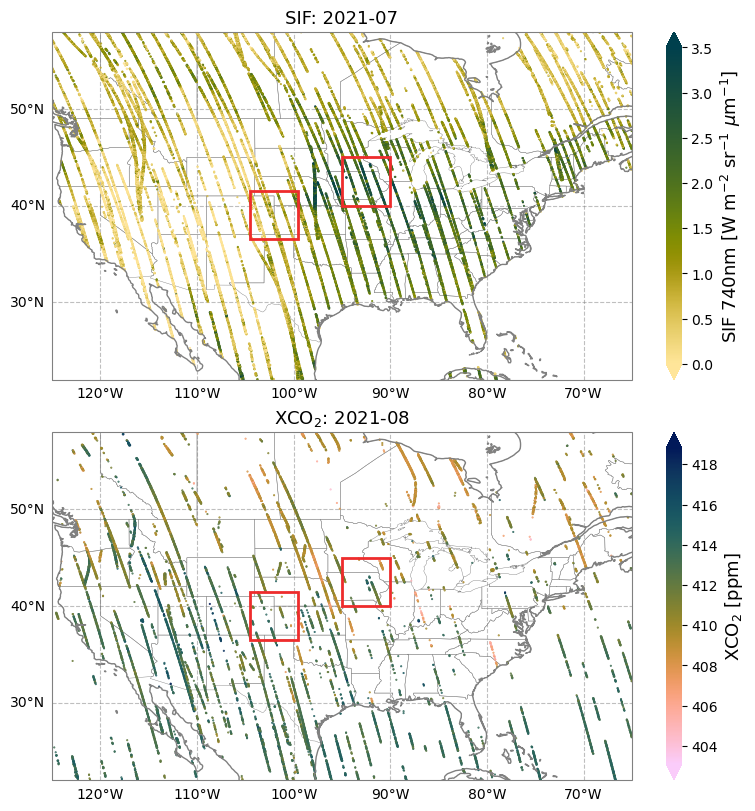

In [5]:
extents = [-125, -65, 22, 58]

fig, axes = plt.subplots(
    2, 1, figsize=(8, 8), subplot_kw={"projection": PROJECTION}, constrained_layout=True
)

prep_axes(axes[0], extents=extents)
axes[0].set_title("SIF: 2021-07", fontsize=13)
field_sif = axes[0].scatter(
    x=df_sif["lon"],
    y=df_sif["lat"],
    c=df_sif["sif"],
    s=1,
    marker=".",
    transform=ccrs.PlateCarree(),
    cmap=cm.bamako_r,
    vmin=0,
    vmax=3.5,
)
cb1 = fig.colorbar(field_sif, ax=axes[0], extend="both")
cb1.set_label(label="SIF 740nm [W m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$]", fontsize=13)
cb1.outline.set_visible(False)

prep_axes(axes[1], extents=extents)
axes[1].set_title("XCO$_2$: 2021-08", fontsize=13)
field_xco2 = axes[1].scatter(
    x=df_xco2["lon"],
    y=df_xco2["lat"],
    c=df_xco2["xco2"],
    s=1,
    marker=".",
    transform=ccrs.PlateCarree(),
    cmap=cm.batlow_r,
)
cb2 = fig.colorbar(field_xco2, ax=axes[1], extend="both")
cb2.set_label(label="XCO$_2$ [ppm]", fontsize=13)
cb2.outline.set_visible(False)


for i in range(len(axes)):
    axes[i].add_patch(
        mpatches.Rectangle(
            xy=[-95, 40],
            width=5,
            height=5,
            facecolor="None",
            edgecolor="#EE2C2C",
            linewidth=2,
            transform=ccrs.PlateCarree(),
        )
    )
    axes[i].add_patch(
        mpatches.Rectangle(
            xy=[-104.5, 36.5],
            width=5,
            height=5,
            facecolor="None",
            edgecolor="#EE2C2C",
            linewidth=2,
            transform=ccrs.PlateCarree(),
        )
    )


In [6]:
fig.savefig("../figures/datasets_202107.pdf", dpi=300, bbox_inches="tight")
